In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("hateful_meme_dataset.csv")
df.head()

,Unnamed: 0,id,img,label,text
0,8025,58612,img/58612.png,1,this is my neighborhood after the mexicans mov...
1,2034,45691,img/45691.png,1,"call me ""sir"" one more time and i'll show you ..."
2,2139,89302,img/89302.png,1,damn son where'd you find this its ok baby im ...
3,7876,47516,img/47516.png,0,a dictator.. emphasis on the dic*
4,3304,40561,img/40561.png,0,feeling pretty cute might blow something up la...


In [2]:
dataset_path = "./dataset/"

In [6]:
df["text"]

0        this is my neighborhood after the mexicans mov...
1        call me "sir" one more time and i'll show you ...
2        damn son where'd you find this its ok baby im ...
3                        a dictator.. emphasis on the dic*
4        feeling pretty cute might blow something up la...
                               ...                        
10654     immigrants wave our flag invaders wave their own
10655    i could have killed all of them. but i let som...
10656    im long and strong and down to get my groove t...
10657            best gamer ever 6 million kills, 1 death"
10658    when people are spreading rumors but you're un...
Name: text, Length: 10659, dtype: object

# Exploratory Data Analysis

In [7]:
df["label"].value_counts()

label
0    6657
1    4002
Name: count, dtype: int64

In [11]:
df["length"] = df["text"].str.len()

<Axes: xlabel='length', ylabel='Count'>

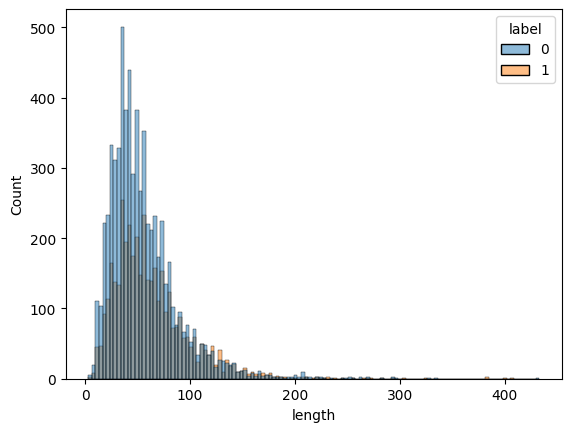

In [12]:
sns.histplot(data=df, x="length", hue="label")

- The distribution is the same

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

cv = CountVectorizer(max_features=10000, stop_words=stopwords.words("english"))
text_bow = cv.fit_transform(df["text"]).toarray()

<Axes: >

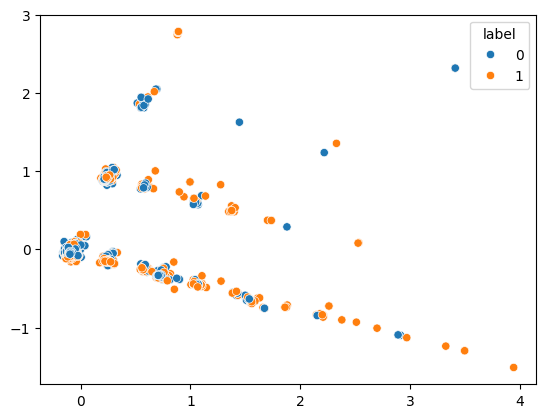

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
text_pca = pca.fit_transform(text_bow)
sns.scatterplot(x=text_pca[:, 0], y=text_pca[:, 1], hue=df["label"])

<Axes: >

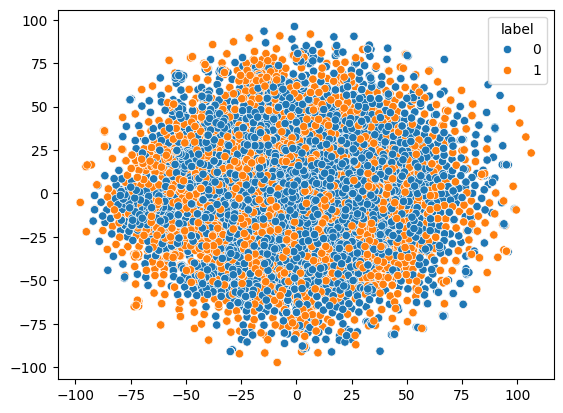

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
text_tsne = tsne.fit_transform(text_bow)
sns.scatterplot(x=text_tsne[:, 0], y=text_tsne[:, 1], hue=df["label"])